# Data les 5 - Kansen en kansverdelingen

Notebook bij les 5 van de leerlijn data van S3 - AI. 

**Voobereiding voor deze les:** Lees de theorie door en maak de opdrachten t/m Opdracht 5.4.

In deze les gaan we het hebben over kansen en kansverdelingen. Dit is in data science relevant omdat we hier met met voorspellingen werken die een bepaalde waarschijnlijkheid (of kans) hebben om correct te zijn. Ook bij het werken met data zijn kansen belangrijk. 

Bekijk je bijvoorbeeld een feature als `prijs in euro's` dan kun je als je de onderliggende *kansverdeling* weet, kun je veel gerichter zoeken naar ouliers of betere keuzes maken bij het vullen van missende waarden. Ook bij het onderdeel simulatie gaan kansverdelingen een rol spelen. Als je een proces gaat simuleren om data te genereren, dan wil je weten wat de kans is dat bepaalde gebeurtenissen zich voor doen.

Kortom, kunnen werken met kansen en kansverdelingen is onmisbaar voor een data scientist.

In deze les zullen we eerst een introductie geven over kansen en daarna behandelen we 3 verdelingen:
- De uniforme verdeling
- De normale verdeling
- De lognormale verdeling

In [63]:
# Importeer de benodigde libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Kansen

De kans op een gebeurtenis  is een getal tussen de 0 en de 1 dat aangeeft hoe waarschijnlijk het is dat de gebeurtenis A zich voordoet. Een kans van 0 geeft aan dat een gebeurtenis zeker niet plaats vindt, bij een kans van 1 weten we dat hij zeker wel plaatsvindt. De notatie voor de kans op gebeurtenis A is: $P(A)$.

**Voorbeelden:**

Stel $A$ is de gebeurtenis: het regent morgen. Dan betekent $P(A) = 0.25$ dat het waarschijnlijk morgen niet zal gaan regenen, maar dat we daar toch niet helemaal zeker van zijn. Je kunt ook zeggen: als er voor 4 dagen de verwachting er precies hetzelfde uitziet als morgen, dan is de verwachting dat het op 1 van die 4 dagen regent. 0.25 is namelijk gelijk aan $\frac{1}{4}$.

Stel $B$ is de gebeurtenis: we gooien een zuiver dobbelsteen en de uitkomst is 6. Dan schrijven we $P(B) = \frac{1}{6}$. Een dobbelsteen heeft namelijk 6 gelijke zijden, en als de dobbelsteen zuiver is heeft iedere zijde evenveel kans om boven te komen. 

Stel $C$ is de gebeurtenis dat het morgen regent of niet regent, dan $P(C) = 1$. We zijn er namelijk zeker van dat het morgen regent of morgen niet regent.

Stel $D$ is de gebeurtenis dat morgenochtend al het water ineens rood is, dan $P(D) =0$. We kunnen wel met zekerheid zeggen dat dat niet gaat gebeuren.


## Stochasten
Bij het voorbeeld van de dobbelsteen hierboven kon de dobbelsteen de waarden 1, 2, 3, 4, 5 of 6 aannemen. De gebeurtenis op een 6 hebben we hierboven aangegeven met $B$. Zo zouden we de gebeurtenis dat de dobbelsteen 4 aangeeft, kunnen aangeven met bijvoorbeeld $K$ en de gebeurtenis dat het 3 wordt met bijvoorbeeld $G$. Het is echter makkelijker om de uitkomst van een dobbelsteen aan te geven met één letter (bijvoorbeeld $X$) en dan te schrijven $P(X=1)$ voor de kans op de gebeurtenis dat de dobbelsteen 1 aangeeft. Of bijvoorbeeld $P(X=6)$ voor de kans op de gebeurtenis dat de dobbelsteen 6 aangeeft.

De $X$ uit het voorbeeld hierboven heet een Stochast of in het Engels een Random Variable. Het Engelse woord dekt de lading eigenlijk heel goed: een stochast is een een variabele waarvan de waarde afhangt van het toeval. Toch kan een stochast niet zo maar elke waarde aannemen. Zodra je een stochast introduceert, moet je aangeven welke waarden ie kan aannemen met welke kansen. Als $X$ weer de uitkomst van een worp met een dobbelsteen aangeeft, dan geldt dat $X$ de waarden 1 tot en met 6 kan aannemen, en:

$$P(X=1) = \frac{1}{6}$$
$$P(X=2) = \frac{1}{6}$$
$$P(X=3) = \frac{1}{6}$$
$$P(X=4) = \frac{1}{6}$$
$$P(X=5) = \frac{1}{6}$$
$$P(X=6) = \frac{1}{6}$$

Merk op dat als je al deze kansen optelt je (afgerond) op 1 uitkomt. Dit is altijd het geval bij een stochast.

Een ander voorbeeld van een stochast is het aantal keer dat op een dag jouw telefoon afgaat. De mogelijke waarden zijn dan bijvoorbeeld 0, 1, 2 en meer dan 2 keer.  Als we deze stochast afkorten met $Y$, dan zou voor een bepaalde persoon kunnen gelden dat 
$$P(Y = 0)=0.5$$ 
$$P(Y=1) = 0.3$$ 
$$P(Y=2)=0.1$$ 
$$P(Y>2)=0.1$$

Tenslotte willen we aangeven wat het verschil is tussen een gebeurtenis (zoals beschreven in het kopje hierboven) en een stochast. Een gebeurtenis is een situatie. Zo'n situatie kan optreden of niet optreden. Wat dat betreft zijn er dus maar 2 mogelijkheden. Als de kans dat een situatie optreedt 0.3 is, dan moet de kans dat de situatie zich niet voordoet altijd 0.7 zijn. Een stochast is een variabele die een aantal waarden kan aannemen, elk met een kans. Het verband tussen deze twee is dat we bij een stochast altijd een gebeurtenis kunnen definiëren, namelijk de gebeurtenis dat de stochast een bepaalde waarde aanneemt. 

## Rekenen met kansen
Vaak is het zo dat we de kans willen weten van een 'samengestelde' gebeurtenis, bijvoorbeeld de kans dat een dobbelsteen een even getal aangeeft. Als we weer $X$ nemen als de stochast die de uitkomst van de dobbelsteen aangeeft, dan is deze kans uit te drukken als: $P(X =2 \lor X=4 \lor X=6)$. Ter herinnering:  $\lor$ is het teken voor de logische 'of'. Nu zijn er een aantal rekenregels die we kunnen gebruiken om deze samengestelde gebeurtenissen uit te rekenen als we de kans op de enklevoudige gebeurtenissen kennen. De eenvoudigste rekenregel is de optelregel voor elkaar uitsluitende gebeurtenissen. Deze luidt:

**Optelregel voor elkaar uitsluitende gebeurtenissen:**

Als slechts één van de gebeurtenissen $A_1, A_2, \ldots , A_n$  tegelijk kan voorkomen, dan geldt dat $$P\left(A_1\vee A_2\vee\ldots\vee A_n\right)=P\left(A_1\right)+P\left(A_2\right)+\cdots+P\left(A_n\right)$$

In ons concrete voorbeeld van de dobbelsteen en de kans op een even uitkomst, geldt dus:
$$P\left(X=2\vee X=4\vee X=6\right)=P\left(X=2\right)+P\left(X=4\right)+P\left(X=6\right)=\frac{1}{6}+\frac{1}{6}+\frac{1}{6}=0.5$$


**Optelregel voor overlappende gebeurtenissen:**

Als twee gebeurtenissen $A_1$ en $A_2$ een overlap hebben, dan moet je ervoor zorgen dat de overlap slechts één keer geteld wordt. Dit krijg je voor elkaar door de overlap $(A_1 \land A_2)$ af te trekken:

$$P\left(A_1\vee A_2\right)=P\left(A_1\right)+P\left(A_2\right)-P\left(A_1\wedge A_2\right)$$

Om deze regel te begrijpen is het zinvol om een Venn diagram voor te stellen:

![venn diagram](./../afbeeldingen/Data/overlappende_gebeurtenissen.png "Venn diagram overlappende gebeurtenissen")


In het voorbeeld hierboven zou  de gebeurtenis kunnen zijn dat je met een dobbelsteen 4 of meer gooit (dus een 4, 5 of 6).  zou de gebeurtenis kunnen zijn dat je een even getal gooit (dus 2, 4 of 6). De kans van beide gebeurtenissen is 0.5. Maar de gebeurtenissen kennen een overlap (als je een 4 of 6 gooit, gelden beide gebeurtenissen). Dus de kans dat $A$  of $B$ zich voordoet is:

$$P(A \lor B) = P(A) + P(B) - P(A \land B) = \frac{1}{2} + \frac{1}{2} - \frac{1}{3} = \frac{2}{3}.$$

**Vermenigvuldigingsregel**

Tenslotte behandelen we nog de vermenigvuldigingsregel. De vermenigvuldigingsregel kan gebruikt worden als we de kans willen berekenen dat twee overlappende gebeurtenissen tegelijkertijd optreden, dus $P(A \land B)$ .

Helaas is deze simpele rekenregel alleen toe te passen als de gebeurtenissen $A$ en $B$ onafhankelijk zijn. In dat geval geldt:
$$P\left(A\wedge B\right)=P\left(A\right)\cdot P\left(B\right)$$

Voorbeeld: stel Jason en Roos gooien elk met een dobbelsteen. De gebeurtenis  is bepaald als Jason gooit vier of meer. De gebeurtenis  dat Roos een 4 of meer gooit met haar dobbelsteen. Wat is de kans dat beiden 4 of meer gooien met hun eigen dobbelsteen? Antwoord:

 $$ P\left(A\wedge B\right)=P\left(A\right)\cdot P\left(B\right) = 0.5 \cdot 0.5 = 0.25$$

Het uitleggen van wat precies onafhankelijke gebeurtenissen zijn, is op dit moment wat lastig (formeel zijn gebeurtenissen onafhankelijk juist als geldt $P\left(A\wedge B\right)=P\left(A\right)\cdot P\left(B\right)$, dus daar schieten we nu niet veel mee op). Denk voor nu aan gebeurtenissen die elkaar niet beïnvloeden. Zoals in het voorbeeld hierboven, waarbij zowel Jason en Roos elk gooien met een eigen dobbelsteen. 

### Data Opdracht 5.1 🖊️ 

Team A en Team B spelen een voetbalwedstrijd. We definieren de gebeurtenis $A$ als Team A wint, $B$ als Team B wint en $D$ als de wedstrijd eindigt in een gelijkspel. We hebben de volgende kansen: $P(A) =0.5$ en $P(D) = 0.25$.
Bereken met pen en papier:
1. Wat is de kans dat team B wint? 
2. Wat is de kans dat team B niet verliest?
3. Maak een tabelletje met alle mogelijke gebeurtenissen in de eerste kolom en de kans op die gebeurtenis in de tweede kolom.

1. 0.25
2. 0.5

### Data Opdracht 5.2 🖊️ 

Stel je gooit met twee dobbelstenen en we definieren $X_1$ = het resultaat van de eerste worp en $X_2$ = het resultaat van de tweede worp. Bereken met pen en papier:
1. $P(X_2 = 4)$
2. $P(X_1 + X_2 = 7)$
3. $P(X_1 \neq 3 \land X_2 \geq 4)$

1. $1/6$
2. $1/6$
3. $5/6 * 0.5 = 5/12$

### Data Opdracht 5.3 🖊️ 
Je gooit 3 keer met een dobbelsteen. Bereken met pen en papier de kans dat je 2 keer een 6 gooit (en dus 1 keer geen 6).

$1/6 * 1/6 * 5/6 = 5/216$, maar er zijn 3 verschillende volgordes hoe je 2 zessen en 1 niet-zes kunt bereiken, dus het is $5/216 * 3 = 15/216$

## Continue stochasten en kansdichtheidsgrafiek

Tot nu toe hebben we voorbeelden gezien van discrete kansen. Er was iedere keer maar een eindig aantal gebeurtenissen mogelijk voor een gegeven stochast. Bijvoorbeeld *het regent wel of het regent niet*, *ik gooi een 1,2,3,4,5 of 6*. Er zijn ook stochasten die een continue waarde kunnen aannemen, zo kan $X$ bijvoorbeeld de temperatuur op een bepaalde dag zijn of de tijd die nodig is om een bepaalde taak te voltooien. Ook kunnen we bijvoorbeeld $X$ definieren als de lengte van een willekeurig gekozen persoon in Europa. In al deze voorbeelden kan $X$ een oneindig aantal waarden aannemen. Je kunt dan geen tabelletje meer maken met de mogelijke uitkomsten en de bijbehorende kans, deze zou namelijk oneindig lang worden en daardoor zal iedere kans (nagenoeg) 0 zijn. 

Uiteraard is er een wel een manier om kansrekening toe te passen op een continue stochast. We voelen allemaal bijvoorbeeld ook wel aan dat de kans dat een willekeurige europese vrouw 1.60 meter lang is, groter is dan dat een een willekeurige Europese vrouw 2.10 meter lang is. Dit soort kansen kun je nu niet weergeven in een tabel, maar in een *kansdichtheidsgrafiek*. 

## Kansdichtheidsgrafiek

Stel we hebben een dataset met een feature *lengte europese vrouw* die de volgende waarden bevat: 

$ length =  [1.59, 1.6 , 1.67, 1.71, 1.71, 1.76, 1.68, 1.83, 1.65, 1.95, 1.74, \\
       1.59, 1.57, 1.73, 1.66, 1.75, 1.73, 1.67, 1.6 , 1.53, 1.64, 1.77, \\
       1.7 , 1.56, 1.7 , 1.72, 1.59, 1.7 , 1.69, 1.57]$

Vanuit een lijst is moeilijk te zien wat veelvoorkomende waarden zijn, of wat het gemiddelde van deze data is. Om dat beter inzichtelijk te maken kun je een histogram maken.

### Data Opdracht 5.4
1. Maak een histogram van de feature *length*. Maak hierbij gebruik van de histplot van seaborn. Probeer verschillende bins uit en bepaal welke het beste resultaat geeft.
2. Pas de y-as aan zodat deze geen aantallen toont, maar kansen. Kijk zelf in de documentatie welke parameter je daarvoor moet gebruiken.
3. Kun je met behulp van het getekende histogram de kans bepalen dat een willekeurige europese vrouw kleiner is dan 1.60 meter? Teken hiervoor eventueel het histogram opnieuw, waarbij je door jezelf gekozen grenzen van de bins meegeeft (zoek het op in de documentatie als je niet weet hoe dat moet).

<Axes: ylabel='Probability'>

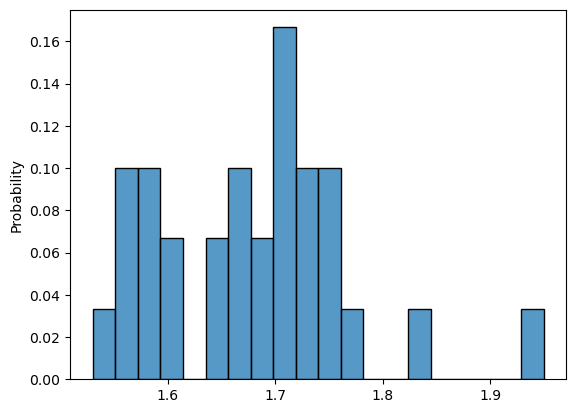

In [64]:
data = [1.59, 1.6 , 1.67, 1.71, 1.71, 1.76, 1.68, 1.83, 1.65, 1.95, 1.74,
       1.59, 1.57, 1.73, 1.66, 1.75, 1.73, 1.67, 1.6 , 1.53, 1.64, 1.77,
       1.7 , 1.56, 1.7 , 1.72, 1.59, 1.7 , 1.69, 1.57]

sns.histplot(data, bins = 20, stat="probability")

De kans dat een willekeurige vrouw kleiner is dan 1.60 meter is iets groter dan 0.2.

**Ik kom uit op ongeveer 0.23**

### Kansen berekenen bij een continue stochast
We hebben al eerder vermeld dat het bij een continue stochast niet mogelijk is om bij iedere voorkomende waarde een kans te bepalen, omdat er oneindig veel mogelijkheden zijn en de kans op 1 specifieke waarde dus (nagenoeg) nul is. Wel kun je de kans bepalen dat een waarde in een bepaald interval ligt, zoals je in de vorige opdracht al gedaan hebt. Je kunt de hoogte van de staafjes binnen een bepaald interval optellen om zo tot de kans te komen dat een willekeurig gekozen waarde in een gegeven interval ligt. De notatie hiervoor is dan als volgt:

Als de stochast $X$ staat voor de lengte van een europese vrouw, dan kun je de kans dat een vrouw kleiner is dan 1.60 weergeven met $P(X < 1.60)$. Als je een correct histogram hebt gemaakt hierboven, kun je aflezen dat op basis van dit datasetje geldt: $P(X < 1.60) \approx 0.23$. Deze kans kun je uiteraard narekenen door te tellen hoeveel observaties kleiner zijn dan 1.60, en dit te delen door het totaal aantal observaties. 

### Data Opdracht 5.5
Nu gaan we hetzelfde doen op een echte dataset. 

1. Lees de dataset `pinguins.csv` in maak een histogram van de feature `bill_length_mm`. Maak bins van 2 mm waarbij de bin-breaks op hele getallen vallen. (Dus bijvoorbeeld een bin van 30-32 mm). Zet ook de parameter `kde=True`.

2. Stel $X$ is de lengte van de snavel van een pinguin, schat met behulp van het histogram (en controleer met behulp van python code) de volgende kansen:
- $P(34 < X < 38)$
- $P(X > 50)$
- $P(X < 32)$


<Axes: xlabel='bill_length_mm', ylabel='Probability'>

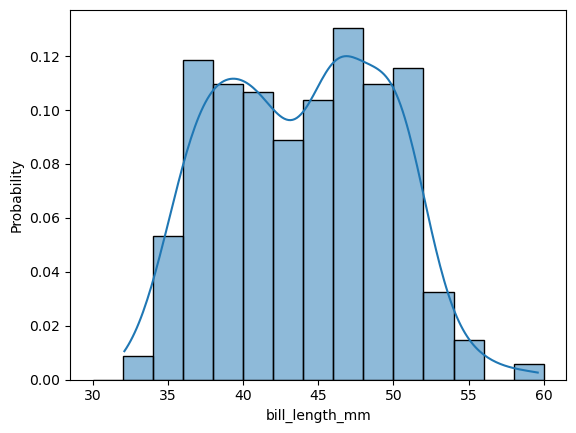

In [65]:
data = pd.read_csv("../databronnen/pinguins.csv")

sns.histplot(data["bill_length_mm"], binwidth=2, binrange=(30, 60), kde=True, stat="probability")

1. ~0.16
2. ~0.15
3. 0

In [66]:
snavels = data["bill_length_mm"]

mask = (snavels < 32)

count = np.sum(mask)

p = count / len(snavels)
p

# alles klopt!

np.float64(0.0)

### Kernel Density Estimation of kansdichtheidsgrafiek (KDE)
In het histogram hierboven heb je de kde-parameter op true moeten zetten, dit staat voor *kernel density estimation*, in het nederlands *kansdichtheidsgrafiek*. Hierdoor wordt er een vloeiende lijn door het histogram getrokken en hiermee wordt de onderliggende *(kans)verdeling* van de data weergegeven. Je kunt het eigenlijk zo zien: als je nog veel meer data zou verzamelen met dezelfde onderliggende verdeling en je zou een lijn trekken door alle toppen van de bins, dan krijg je de kansdichtheidsgrafiek. Deze is minder afhankelijk van de grootte van je dataset en van de gekozen bingrootte, daarom wordt deze vaak geplot over een histogram.

Er zijn een aantal veelvoorkomende vormen voor deze kansdichtheidsgrafiek, en voor deze varianten zijn de onderliggende kansverdelingen zijn dan ook goed te analyseren. We gaan er ind deze les 3 behandelen:

- uniforme verdeling
- normale verdeling
- lognormale verdeling

Later komen daar nog de Poisson verdeling en de exponentiële verdeling bij.

### Visualiseren van een uniforme verdeling
We gaan nu kijken hoe de uniforme verdeling eruit ziet als je er een histogram bij tekent. Hiervoor gaan we gebruik maken van een kleine simulatie om het gooien van een dobbelsteen na te bootsen. Het gooien met een dobbelsteen is niks anders dan een 1, 2, 3, 4, 5 of 6 kiezen, allemaal met een kans van 1/6. In code kan dat zo:

In [67]:
# geef een random getal tussen 1 en 6
np.random.randint(1, 7)

6

Laten we dit 100 keer doen en dan een histogram maken van de uitkomsten (kun je zelf al bedenken hoe die eruit zal komen te zien?):

<Axes: ylabel='Probability'>

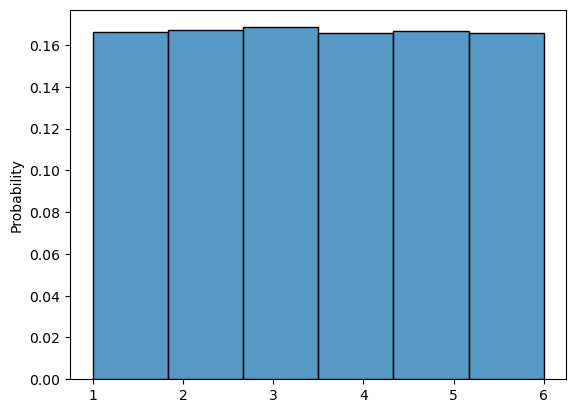

In [68]:
# De size geeft het aantal worpen van de dobbelsteen aan. Hoe groter hij wordt, hoe beter je de uniforme verdeling terug ziet komen.
eyes = np.random.randint(1, 7, size=100000)
sns.histplot(eyes, stat="probability", bins=6)

*Docentinstructie*
Beginnen met klein aantal worpen, dan zie je nog veel variatie. Uitleg dat dit beter wordt, naarmate je meer experimenten doet. Link leggen naar feature met lengte van europese vrouwen. Dit waren te weinigpunten om de goede distributie te zien.

### Data Opdracht 5.6
Nu gaan we hetzelfde doen voor een continue stochast. 
1. Gebruik numpy om een $x$ aantal random getallen tussen 0 en 1 te genereren en maak hier een histogram van. 
2. Hoe groot moet $x$ zijn om een mooie uniforme verdeling te krijgen? 
3. Stel $X$ is een de waarde van een willekeurig gekozen getal tussen 0 en 1, wat is dan $P(0.2 < X < 0.6)$?

<Axes: ylabel='Count'>

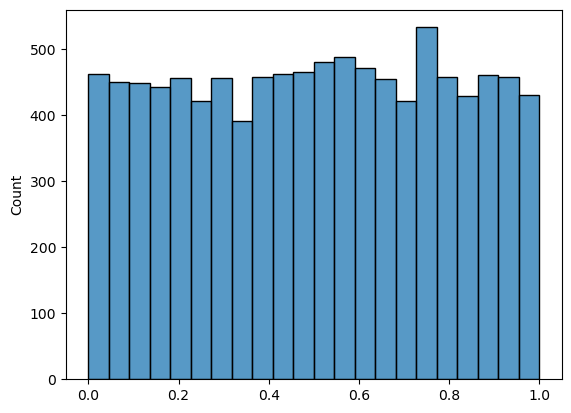

In [69]:
getallen = np.random.random(10000)

sns.histplot(getallen)

2. zo veel mogelijk, hangt ook af van de hoeveelheid bins.
3. 0.4

### De normale verdeling

Een andere veelvoorkomende continue kansverdeling is de normaalverdeling. Dit is een verdeling die vaak voorkomt in de natuur (denk aan lengtes en gewichten) en deze zal je dus ook vaak terugzien in je data. De kansdichtheidsgrafiek van de normaalverdeling is *klokvormig*, waarbij de meeste waarden zich rond het gemiddelde bevinden en de kans op waarden verder van het gemiddelde afneemt.

De normaalverdeling kun je beschrijven aan de hand van 2 maten: het gemiddelde $\mu$ en de standaarddeviatie $\sigma$. Het gemiddelde geeft aan waar de top van de klokvorm ligt, en de standaarddeviatie bepaalt hoe breed of smal de klokvorm is. Een kleinere standaarddeviatie betekent dat de waarden dichter bij het gemiddelde liggen, terwijl een grotere standaarddeviatie betekent dat de waarden verder verspreid zijn. 

### Visualisatie van de normale verdeling
We gaan gebruikmaken van numpy om data te genereren die normaal verdeeld is. Hiermee kunnen we dan een histogram maken om de vorm van de normaalverdeling te visualiseren.

<Axes: ylabel='Probability'>

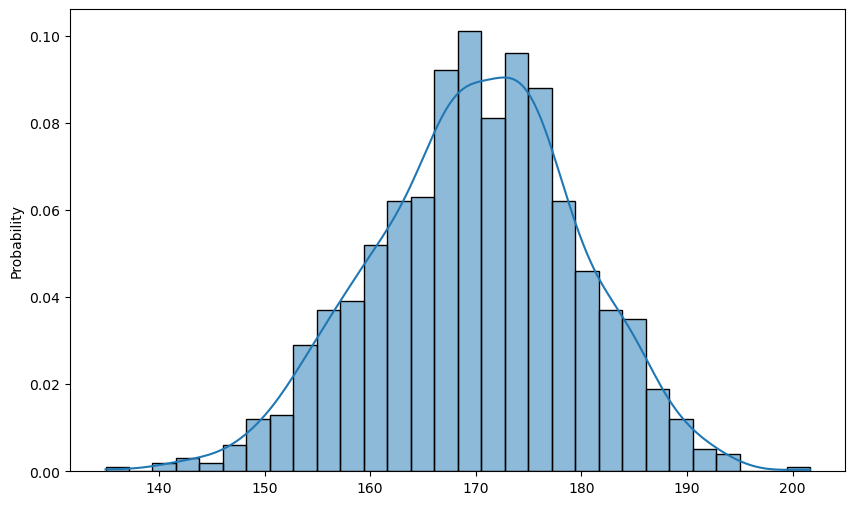

In [70]:
#Genereer 1000 getallen uit een normaalverdeling met gemiddelde 170 en standaarddeviatie 10
samples = np.random.normal(170, 10, size=1000)
# Maak een histogram van de samples
plt.figure(figsize=(10, 6))
sns.histplot(samples, stat="probability", bins=30, kde=True)

Hier plotten we de kansdichtheidgrafiek over het histogram heen, maar bij kansdichtheidsgrafiek van de normaalverdeling heeft een vast formule, die afhangt van het gemiddelde en de standaarddeviatie. Deze wordt gegeven door:
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

Hierbij is $e$ de constante van Euler (2.718), $\mu$ het gemiddelde en $\sigma$ de standaarddeviatie.

Om het effect van het gemiddelde en de standaarddeviatie op de normale verdeling te zien, plotten we nu 3 verschillende normaalverderlingen met verschillende gemiddeldes en standaardafwijkingen.


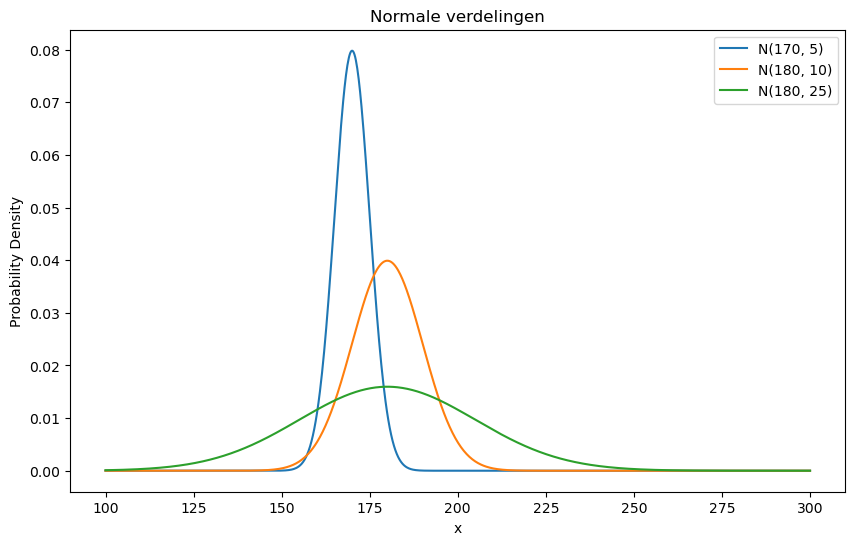

In [71]:
mu_1 = 170
sigma_1 = 5
mu_2 = 180
sigma_2 = 10
mu_3 = 180
sigma_3 = 25

x = np.linspace(100, 300, 1000)

# Genereer de normale verdelingen
def normal_distribution(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot de normale verdelingen
plt.figure(figsize=(10, 6))
plt.plot(x, normal_distribution(mu_1, sigma_1, x), label='N(170, 5)')
plt.plot(x, normal_distribution(mu_2, sigma_2, x), label='N(180, 10)')
plt.plot(x, normal_distribution(mu_3, sigma_3, x), label='N(180, 25)')
plt.title('Normale verdelingen')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()


Je ziet hier duidelijk dat de piek van de grafiek steeds bij het gemiddelde ligt, en dat een grotere standaarddeviatie zorgt voor een bredere spreiding. Zo hebben de groene en de oranje grafiek hetzelfde gemiddelde, maar de standaarddeviatie van de groene grafiek is groter, waardoor de grafiek breder is.

### Vuistregels voor de normale verdeling

De normaalverdeling heeft een aantal interessante eigenschappen die handig zijn om te weten:
1. Ongeveer 68% van de waarden ligt binnen één standaarddeviatie van het gemiddelde ($\mu \pm \sigma$).
2. Ongeveer 95% van de waarden ligt binnen twee standaarddeviaties van het gemiddelde ($\mu \pm 2\sigma$).
3. Ongeveer 99.7% van de waarden ligt binnen drie standaarddeviaties van het gemiddelde ($\mu \pm 3\sigma$).
Deze eigenschappen worden vaak de "68-95-99.7 regel" genoemd en zijn handig om snel een idee te krijgen van de spreiding van de data.

Hieronder zie je dat in een plaatje:

![normale verdeling](./../afbeeldingen/Data/vuistregels_normaalverdeling.png "Vuistregels normale verdeling")

### Data Opdracht 5.7
We gaan even terug naar de pinguin dataset `pinguins.csv`.  
1. Maak histogrammen van de numerieke kolommen en bepaal of deze variabelen (bij benadering) normaal verdeeld zijn of niet. 
2. Sommige variabelen zijn wel normaal verdeeld, maar alleen als je ze per soort of per geslacht bekijkt. Maak de visualisaties zo dat dit goed zichtbaar wordt.
3. Bereken van de variabelen die (bij benadering) normaal verdeeld zijn het gemiddelde en de standaarddeviatie.

## Kansen berekenen met de normale verdeling
Als een variabele normaal verdeeld is, dan hebben we een formule voor de kansdichtheidsgrafiek, waardoor we ook precies uit kunnen rekenen wat de kans is dat de variabele bepaalde waarden aanneemt. Eerder heb je dat gedaan door de hoogte van de staafjes van een histogram bij elkaar op te tellen. Nu we een formule hebben voor de grafiek kunnen we dit doen door de oppervlakte onder de grafiek te bepalen. Een voorbeeld:

Stel de lengte van de snavel van een pinguinsoort is normaal verdeeld met een gemiddelde van 44mm ($\mu = 44$) en een standaardaviatie van 5mm ($\sigma = 5$). Dan weten we met behulp van de vuistregels die hierboven zijn gegeven dat:
- De kans dat een willekeurige pinguin een snavel heeft met een lengte tussend de 39mm en 49mm ($\mu - \sigma$ en $\mu + \sigma$) is ongeveer 68% (1 standaarddeviatie van het gemiddelde).
- De kans dat een willekeurige pinguin een snavel heeft met een lengte tussen de 34mm en 54mm ($\mu - 2\sigma$ en $\mu + 2\sigma$) is ongeveer 95%.
- De kans dat een willekeurige pinguin een snavel heeft met een lengte groter dan 54mm ($\mu + 2\sigma$) is ongeveer 2.5%.

Willen we kansen berekenen die niet precies vallen op de standaarddeviaties, dan kunnen we gebruik maken van de kansdichtheidsgrafiek. Als je bijvoorbeeld de kans wilt berekenen dat een willekeurige pinguin een snavel heeft die langer is dan 50mm, dan kun je de oppervlakte onder de kansdichtheidsgrafiek rechts van 50mm bepalen. Zie hieronder:

![normaleverdeling.png](../afbeeldingen/Data/normaleverdeling.png "Kansdichtheidsgrafiek normale verdeling")

Om deze oppervlakte te bepalen, moeten we gebruik maken van de functie voor de cumulatieve verdeling (cdf). Deze geeft de kans dat een variabele kleiner of gelijk is aan een bepaalde waarde. We behandelen deze niet in detail, omdat je de wiskunde die daarvoor nodig is out of scope is, maar je kunt deze wel gebruiken in Python.

Met de code:
```python
stats.norm.cdf(t, loc=44, scale=5)
```
bereken je de kans dat dat een variabele kleiner of gelijk is aan $t$, waarbij de variabele normaal verdeeld is met een gemiddelde van 44 en een standaarddeviatie van 5. Dat komt overeen met de oppvervlakte onder de kansdichtheidsgrafiek tot aan $t$. Zie hieronder:

![cumulatieve verdeling](./../afbeeldingen/Data/cdf.png "Cumulatieve verdeling")

Nu kunnen we dit gebruiken om te bepalen wat de kans is dat de snavel van een pinguin groter of gelijk is aan 50 mm. Hieronder de code:

In [72]:
import scipy.stats as stats

kans_kleiner_dan_50 = stats.norm.cdf(50, loc=44, scale=5)
kans_groter_dan_50 = 1 - kans_kleiner_dan_50
print(f"Kans dat een willekeurige pinguin een snavel heeft langer dan 50mm: {kans_groter_dan_50:.2f}")

Kans dat een willekeurige pinguin een snavel heeft langer dan 50mm: 0.12


Let op: `stats.norm.cdf` geeft de kans dat een variabele kleiner is dan of gelijk aan een bepaalde waarde. De kans dat deze dan groter is dan die waarde, is dan gelijk aan 1 min de gevonden kans.

Hier hebben we dus gevonden:
$P(X > 50) = 1 - P(X < 50) = 1 - 0.88 = 0.12$, waarbij $X$ de lengte van de snavel van een willekeurige pinguin is.

```python

### Opdracht 5.8
Laat $X$ de de flipperlengte van een pinguin soort zijn, die normaal verdeeld is met een gemiddelde van 200mm en een standaarddeviatie van 14mm. 
1. Teken de bijbehorende kansdichhtheidsgrafiek.
2. Bereken $P(X < 186)$.
3. Bereken $P(X < 180)$.
4. Bereken $P(190 < X< 210)$.
Maak waar nodig gebruik van de `scipy.stats.norm` module.

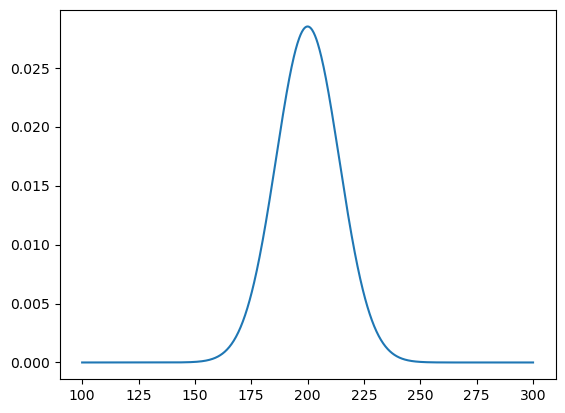

In [73]:
flippers = pd.read_csv("../databronnen/pinguins.csv")["flipper_length_mm"]

def normal_distribution(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.plot(x, normal_distribution(200, 14, x))
plt.show()

In [74]:
print(stats.norm.cdf(186, loc=200, scale=14))
print(stats.norm.cdf(180, loc=200, scale=14))

# kans X < 210 MIN kans X < 190
kans_210 = stats.norm.cdf(210, loc=200, scale=14)
kans_190 = stats.norm.cdf(190, loc=200, scale=14)
print(kans_210 - kans_190)



0.15865525393145707
0.07656372550983476
0.5249494759460469


### Datapreparatie met de normale verdeling
Als je weet dat je data normaal verdeeld is, kun je de eigenschappen hiervan gebruiken om je data beter te prepareren. Vooral bij het vinden van outliers en bij het normaliseren van data is dit handig. 

Bij beide gevallen heb je de z-score nodig, dit een maat die aangeeft hoe veel standaarddeviaties een bepaalde waarde van het gemiddelde afligt en die bereken je met de volgende formule:
$$ z = \frac{x - \mu}{\sigma} $$

Een voorbeeld:

We kijken weer naar de lengte van europese vrouwen, zoals hierboven:

$length = [1.59, 1.6 , 1.67, 1.71, 1.71, 1.76, 1.68, 1.83, 1.65, 1.95, 1.74,
       1.59, 1.57, 1.73, 1.66, 1.75, 1.73, 1.67, 1.6 , 1.53, 1.64, 1.77,
       1.7 , 1.56, 1.7 , 1.72, 1.59, 1.7 , 1.69, 1.57]$

Laten we eerst het gemiddelde en de standaarddeviatie berekenen:

In [75]:
length = np.array([1.59, 1.6 , 1.67, 1.71, 1.71, 1.76, 1.68, 1.83, 1.65, 1.95, 1.74,
       1.59, 1.57, 1.73, 1.66, 1.75, 1.73, 1.67, 1.6 , 1.53, 1.64, 1.77,
       1.7 , 1.56, 1.7 , 1.72, 1.59, 1.7 , 1.69, 1.57])

std_length = np.std(length)
mean_length = np.mean(length)
std_length, mean_length

(np.float64(0.08743505526325746), np.float64(1.678666666666667))

We zien dat de gemiddelde lengte 1.68 meter is en de standaarddeviatie ongeveer 9 cm. Nu gaan we voor iedere waarde in de lijst de z-score berekenen.

In [76]:

z_scores_length = (length - mean_length) / std_length
z_scores_length

array([-1.01408601, -0.89971541, -0.09912119,  0.35836122,  0.35836122,
        0.93021424,  0.01524941,  1.73080846, -0.3278624 ,  3.1032557 ,
        0.70147303, -1.01408601, -1.24282722,  0.58710243, -0.21349179,
        0.81584364,  0.58710243, -0.09912119, -0.89971541, -1.70030963,
       -0.442233  ,  1.04458484,  0.24399062, -1.35719782,  0.24399062,
        0.47273183, -1.01408601,  0.24399062,  0.12962002, -1.24282722])

We zien bijvoorbeeld dat de eerste waarneming -1.014 standaarddeviaties onder het gemiddelde ligt. Ook zien we dat er 1 waarneming is die meer dan 3 standaarddeviaties boven het gemiddelde ligt. Dit kan een mogelijke outlier zijn.

### Data opdracht 5.9
1. Lees de dataset fruit.txt in als pandas dataframe en bereken voor iedere numerieke kolom de z-scores. 
2. Bepaal met deze z-scores of er mogelijke outliers in de dataset zitten. Maak ook een visualisatie om dit te controleren.
3. Maak een scatterplot van de kolommen `mass` en `height`.
4. Maak een scatterplot van de z-scores van `mass` en `height`. Wat valt je op?





Wil je meer uitleg over de normale verdeling, lees dan:  https://blog.bijleshuis.be/normaalverdeling-standaardnormale-verdeling-zscore
Of bekijk onderstaande video's:
- https://youtu.be/oK6ShjnP55A
- https://youtu.be/Nsvj2uca6Hw

### Lognormale verdeling
In de praktijk is een variabele vaak niet normaal, maar lognormaal verdeeld. Dit is een *scheve* normaal verdeling en deze ziet er zo uit:

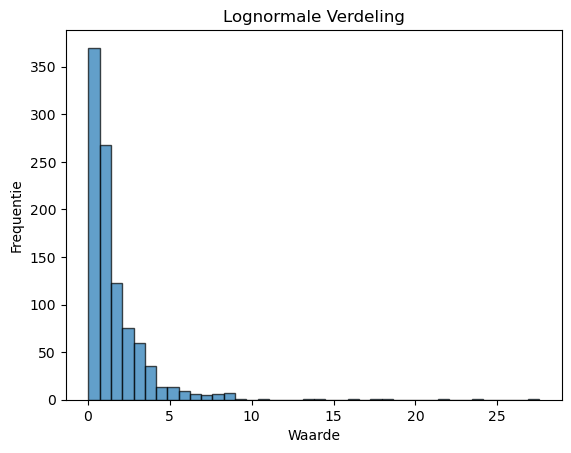

In [77]:
# Genereer een lognormale dataset
data_lognormal = np.random.lognormal(mean=0, sigma=1, size=1000)

# Visualiseer de dataset met een histogram
plt.hist(data_lognormal, bins=40, edgecolor='k', alpha=0.7)
plt.title('Lognormale Verdeling')
plt.xlabel('Waarde')
plt.ylabel('Frequentie')
plt.show()

We zien dat er een lange staart aan de rechterkant van de verdeling is. Dit is een kenmerk van de log-normale verdeling. In dit geval zijn de meeste waarden geconcentreerd rond de lagere waarden, met uitschieters naar boven.

Door het logaritme van de waarden te nemen, krijgen we wel een mooie normale verdeling. Dit kan helpen om de data te visualiseren, maar ook bij het vinden van outliers.

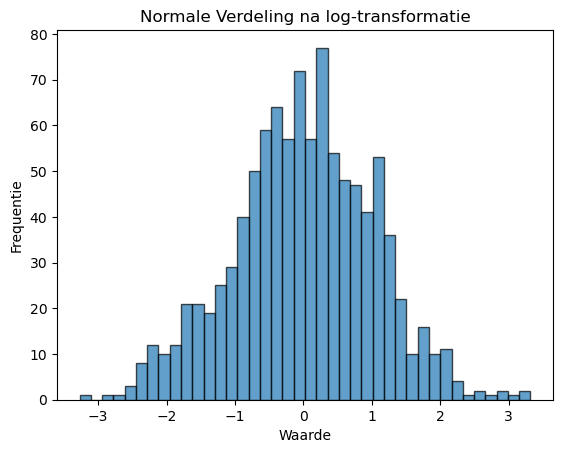

In [78]:
data_normal = np.log(data_lognormal)
plt.hist(data_normal, bins=40, edgecolor='k', alpha=0.7)
plt.title('Normale Verdeling na log-transformatie')
plt.xlabel('Waarde')
plt.ylabel('Frequentie')
plt.show()

### Data opdracht 5.10
Maak een histogram van de `price` kolom van de airbnb data van de stad die je eerder in de data-lessen hebt gebruikt. 
Is deze data (bij benadering) normaal of misschien lognormaal verdeeld? Als hij log-normaal verdeeld is, doe dan een log-transformatie en maak opnieuw een histogram. Bereken de z-scores en bepaal daarmee of er mogelijke outliers in de data zitten. 

Ga ook op zoek naar correlaties tussen `price' en andere numerieke kolommen. Wordt de correlatie beter als je de log-transformatie toepast? Wat zou dat betekenen voor het maken van een voorspellend model?